# The Admin TUI

## Requiments
- Only npyscreen is required
- Official Doc.                 >>    https://npyscreen.readthedocs.io/index.html
- detaild PDF doc. (relase 2)   >>    https://buildmedia.readthedocs.org/media/pdf/npyscreen/latest/npyscreen.pdf
- Google group for Npyscreen    >>    https://groups.google.com/g/npyscreen
- Offical Git                   >>    https://github.com/npcole/npyscreen 

--------------------------------------
- This part to just show the images in the nootbook

In [2]:

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt


---------------------------------

- ### Part 1 : Make Boxes around Grid

In [1]:
# !/usr/bin/env python
### encoding: utf-8
import npyscreen

class MyGrid_H(npyscreen.GridColTitles):       
    def custom_print_cell(self, actual_cell, cell_display_value):
        
        if cell_display_value in ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"]:
           actual_cell.color = 'GOOD'

class InputBox_H(npyscreen.BoxTitle):
    _contained_widget = MyGrid_H

def myFunction(*args):
    F = npyscreen.Form(name='Example viewer')
    gd = F.add(InputBox_H, name="",max_height=5,max_width=100,width = 50)
    gd.values = []
    gd.values.append(
           ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"])
    myFW = F.add(npyscreen.TitleText,name="title text", rely=10,relx=75)
    F.edit()

if __name__ == '__main__':
    npyscreen.wrapper_basic(myFunction)

- ### Output 1

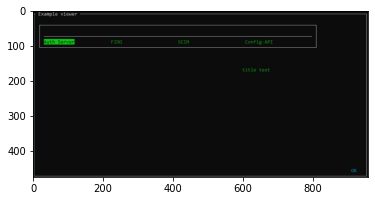

In [3]:
im_array = np.asarray(cv2.imread('grid_with_column.png'))
plt.imshow(im_array)
plt.show()

---------------------------------------------------

- ### Part 2 : Inhirit two diffrent calss from Box class and stracture rely,relx


In [ ]:
import curses
import npyscreen

class MyGrid_H(npyscreen.GridColTitles): 

    def __init__(self, screen, col_titles=None, *args, **keywords):
        super().__init__(screen, col_titles, *args, **keywords)
        self.col_margin=4,
        self.select_whole_line = False


    def custom_print_cell(self, actual_cell, cell_display_value):
        
        if cell_display_value in ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"]:
           actual_cell.color = 'WHITE'

class InputBox_H(npyscreen.BoxTitle):
    _contained_widget = MyGrid_H
    _contained_widget = npyscreen.TitleText

def myFunction(*args):    
    F = npyscreen.Form(name='',color="COLOR_GREEN", labelColor='COLOR_GREEN')
    F.add(npyscreen.TitleText,name="  Jassan Admin",editable=False)
    gd = F.add(InputBox_H, name="",max_height=5,max_width=115)
    gd.values = []
    gd.values.append(
           ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"])

    myFW = F.add(InputBox_H,name="title text", rely=10,relx=60)
    F.edit()
        
if __name__ == '__main__':
    npyscreen.wrapper_basic(myFunction)

- ### Output 2

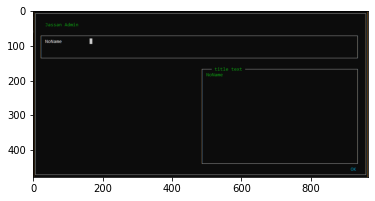

In [4]:
im_array = np.asarray(cv2.imread('spliting_multi_boxes.png'))
plt.imshow(im_array)
plt.show()

----------------------------------------------------------------

- ### Part 3 : Vertical Box with Data to select


In [ ]:
import npyscreen

class InputBox(npyscreen.BoxTitle):
    _contained_widget = npyscreen.TitleText
    _contained_widget_height = 2

class Form1(npyscreen.Form):
    def create(self):
        self.add(npyscreen.TitleText,name="  Jassan Admin",editable=False)##
        
        self.add(npyscreen.BoxTitle, name="",
                    custom_highlighting=True, values=["Basic", "Token","Logout",
                     "Timeout","URIs", "Encription","Client Properties", "Client Scripts","Save"],
                     value=[1, ],max_height=12,max_width=25,)
        self.add(npyscreen.TitleText,name='starting')


    def afterEditing(self):
        self.parentApp.setNextForm(None)

    def display_value(self, vl):
        return vl
        
        
class HopaApp(npyscreen.NPSAppManaged):
    def onStart(self):
        npyscreen.setTheme(npyscreen.Themes.ColorfulTheme)
        self.addForm("MAIN",Form1, name="MAIN" ) ##, color="CURSOR_INVERSE", 

if __name__ == "__main__":
    App = HopaApp()
    App.run()


- ### Output 3

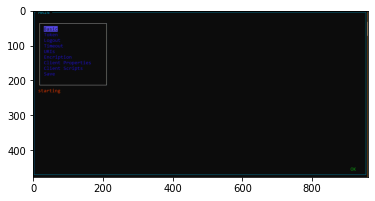

In [5]:
im_array = np.asarray(cv2.imread('part3_v_columns.PNG'))
plt.imshow(im_array)
plt.show()

-----------------------------------

### To DO Next
- Merge all of them
- Make certain value change on selection
- make row width smaller (not all 6 appears)
